## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [110]:
!wget https://www.dropbox.com/s/75s2fe1auefzx2f/train.csv
taxi_data = pd.read_csv("/kaggle/working/train.csv")


--2023-06-10 14:14:36--  https://www.dropbox.com/s/75s2fe1auefzx2f/train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/75s2fe1auefzx2f/train.csv [following]
--2023-06-10 14:14:36--  https://www.dropbox.com/s/raw/75s2fe1auefzx2f/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6e2f2d1a950852088860fb7d33.dl.dropboxusercontent.com/cd/0/inline/B9tKNdFrRVAwQgSxcNPevsVx00dQk8Y5zwwF8dLPFw5l4LzhABwxMEDvsg_bijGtnVBQRdxN_7CbufzOzaFsuFIKuwcbph4xyjFcVcTEYtpOxuNO7ko1_YEDvZW6_cA2s4RqSFIJiJzkA6zHfUs2tgKcHDU6ojTkwmLdGy3Oc9R6Ng/file# [following]
--2023-06-10 14:14:37--  https://uc6e2f2d1a950852088860fb7d33.dl.dropboxusercontent.com/cd/0/inline/B9tKNdFrRVAwQgSxcNPevsVx00dQk8Y5zwwF8dLPFw5l4LzhABwxMEDvsg_bijGtnVBQRdxN_7CbufzOzaFsuF

In [111]:
#taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-74,41,-74,41,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-74,41,-74,41,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-74,41,-74,41,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,41,-74,41,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-74,41,-74,41,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [112]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data['dropoff_datetime'] = pd.to_datetime(taxi_data['dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data.sample(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
76170,id3882091,1,2016-06-17 18:27:29,2016-06-17 19:47:28,1,-74,41,-74,41,N,4799
852206,id3487564,1,2016-03-17 07:01:35,2016-03-17 07:33:10,3,-74,41,-74,41,N,1895
102882,id3092006,2,2016-06-20 11:19:45,2016-06-20 11:42:06,1,-74,41,-74,41,N,1341
475681,id0241820,1,2016-03-17 19:47:17,2016-03-17 19:58:40,1,-74,41,-74,41,N,683
595331,id0072875,2,2016-04-22 21:22:05,2016-04-22 21:31:52,1,-74,41,-74,41,N,587


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [113]:
taxi_data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [114]:
taxi_data['vendor_id'].value_counts()#уникальные таксопарки

2    780302
1    678342
Name: vendor_id, dtype: int64

In [115]:
taxi_data['passenger_count'].max() #максимальное количество пассажиров

9

In [116]:
pd.options.display.float_format = '{:20,.0f}'.format
pd.DataFrame(data=taxi_data['trip_duration'].describe())

,trip_duration
count,"1,458,644"
mean,959
std,"5,237"
min,1
25%,397
50%,662
75%,"1,075"
max,"3,526,282"


**ответ:** среднее значение - 959, медиана - 662, минимальная продолжительность - 1 минута, максимальная - 3 526 282

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [117]:
def add_datetime_features(df):
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.weekday
    
    return df

In [118]:
taxi_data = add_datetime_features(taxi_data)
taxi_data.sample(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week
608425,id2777159,2,2016-05-25 19:13:22,2016-05-25 19:25:53,1,-74,41,-74,41,N,751,2016-05-25,19,2
1043917,id1042074,2,2016-02-20 02:32:26,2016-02-20 02:38:55,1,-74,41,-74,41,N,389,2016-02-20,2,5
197116,id1433285,1,2016-06-26 15:13:07,2016-06-26 16:00:15,1,-74,41,-74,41,N,2828,2016-06-26,15,6
307817,id2626963,1,2016-04-19 21:22:56,2016-04-19 21:31:51,1,-74,41,-74,41,N,535,2016-04-19,21,1
906065,id1833964,2,2016-02-04 17:44:12,2016-02-04 17:53:43,1,-74,41,-74,41,N,571,2016-02-04,17,3


In [11]:
taxi_data['pickup_day_of_week'].value_counts()

4    223533
5    220868
3    218574
2    210136
1    202749
6    195366
0    187418
Name: pickup_day_of_week, dtype: int64

### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [119]:
!wget https://www.dropbox.com/s/0sr9umjdwbt1iir/holiday_data.csv
holiday_data = pd.read_csv('/kaggle/working/holiday_data.csv', sep=';')

--2023-06-10 14:15:05--  https://www.dropbox.com/s/0sr9umjdwbt1iir/holiday_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0sr9umjdwbt1iir/holiday_data.csv [following]
--2023-06-10 14:15:05--  https://www.dropbox.com/s/raw/0sr9umjdwbt1iir/holiday_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc02f3c1137f25d449ce446a50e5.dl.dropboxusercontent.com/cd/0/inline/B9vk8Kcxb9nP2oWh5EWEJBK0wgFjmnhuzuo2iTWUyIt34-YIdXnf3_IzqiEMRQbLGA7xRfMbG7zFO0QnR53txub-ZD7Au772GLvq1aYn5ZX-qEMneS3BGs2i_g-NVon2UkwdMn2cE8aYvat5USFkDGk2zpQ7FM-y8XzAEkVnKaxBWg/file# [following]
--2023-06-10 14:15:06--  https://uc02f3c1137f25d449ce446a50e5.dl.dropboxusercontent.com/cd/0/inline/B9vk8Kcxb9nP2oWh5EWEJBK0wgFjmnhuzuo2iTWUyIt34-YIdXnf3_IzqiEMRQbLG

In [13]:
#holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')
# ваш код здесь

In [13]:
def add_holiday_features(df, df_h):
    df_h['date'] = pd.to_datetime(df_h['date'], format='%Y-%m-%d %H:%M:%S').dt.date
    df['pickup_holiday'] = df['pickup_date'].isin(df_h['date']).astype('int')
    
    return df
    

In [120]:
taxi_data = add_holiday_features(taxi_data, holiday_data)
taxi_data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-74,41,-74,41,N,455,2016-03-14,17,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-74,41,-74,41,N,663,2016-06-12,0,6,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-74,41,-74,41,N,2124,2016-01-19,11,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,41,-74,41,N,429,2016-04-06,19,2,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-74,41,-74,41,N,435,2016-03-26,13,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-74,41,-74,41,N,778,2016-04-08,13,4,0
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74,41,-74,41,N,655,2016-01-10,7,6,0
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-74,41,-74,41,N,764,2016-04-22,6,4,0
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-74,41,-74,41,N,373,2016-01-05,15,1,0


In [121]:
taxi_data[taxi_data['pickup_holiday'] == 1]['trip_duration'].median()

585.0

### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [122]:
!wget https://www.dropbox.com/s/0cj1u5zeeyanw23/osrm_data_train.csv
osrm_data = pd.read_csv('/kaggle/working/osrm_data_train.csv')
osrm_data

--2023-06-10 14:15:16--  https://www.dropbox.com/s/0cj1u5zeeyanw23/osrm_data_train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0cj1u5zeeyanw23/osrm_data_train.csv [following]
--2023-06-10 14:15:16--  https://www.dropbox.com/s/raw/0cj1u5zeeyanw23/osrm_data_train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8165def5917f82afe7c4c65bbf.dl.dropboxusercontent.com/cd/0/inline/B9v79czGGfARiehLzRBWgrzS9WlITarLN39qj4lwYGF0kNX6dxfHr1SnGvbcTrWhklw3iLPCjhTl41L_oeSUbaWJ7Nj8Iis8nkkmyT1GDrLtbKwpitY-j5ArFWT24QXKLgK44_Xkm2YKqDCvLcGPduKIQ8gcLjK8wAPsv_5VPy4prQ/file# [following]
--2023-06-10 14:15:17--  https://uc8165def5917f82afe7c4c65bbf.dl.dropboxusercontent.com/cd/0/inline/B9v79czGGfARiehLzRBWgrzS9WlITarLN39qj4lwYGF0kNX6dxfHr1Sn

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,"2,009",165,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,"2,513",332,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,"1,779",236,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,"1,615",140,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,"1,394",189,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."
...,...,...,...,...,...,...,...,...,...,...,...,...
1458638,id2976426,Cargo Plaza,East 51st Street,"28,051","1,462",13,Cargo Plaza|Cargo Plaza|Van Wyck Expressway|Ca...,145.4|1039|12154.4|931.8|6422.3|3745.6|2032.5|...,21|82.8|489.4|57.2|359.5|164.1|139.9|14.4|2.9|...,depart|on ramp|new name|off ramp|merge|fork|ne...,right|slight right|straight|slight right|sligh...,"-73.78445,40.648461|-73.785844,40.647851|-73.7..."
1458639,id1440046,Former Terminal 6 Departures,3rd Avenue,"29,616","1,643",16,Former Terminal 6 Departures|Cargo Plaza|Cargo...,110.2|415.2|895.1|12154.4|931.8|6422.3|1686.5|...,15.9|63.9|71.6|489.4|57.2|359.5|81.8|19.4|10.3...,depart|fork|on ramp|new name|off ramp|merge|fo...,right|slight left|straight|straight|slight rig...,"-73.779336,40.647005|-73.780349,40.64763|-73.7..."
1458640,id1607338,Cargo Plaza,West 8th Street,"25,615","1,765",30,Cargo Plaza|Cargo Plaza|Cargo Plaza|Cargo Plaz...,179.5|66.3|314.8|431.8|1557.5|266.3|454.7|604|...,28|9.5|25.2|34.5|62|21.3|36.6|24.1|25.2|238.2|...,depart|fork|on ramp|fork|new name|off ramp|for...,none|slight right|straight|slight left|straigh...,"-73.786697,40.641627|-73.78622,40.643052|-73.7..."
1458641,id2071901,Cargo Plaza,Laurel Hill Boulevard,"20,284","1,074",14,Cargo Plaza|Cargo Plaza|Cargo Plaza|Van Wyck E...,124.3|535.2|895.1|12154.4|931.8|1521.6|573.1|3...,22|79|71.6|489.4|57.2|85.4|45.9|28.5|22.2|9.5|...,depart|fork|fork|new name|off ramp|merge|off r...,right|straight|slight left|straight|slight rig...,"-73.782317,40.644873|-73.780877,40.645095|-73...."


In [18]:
#osrm_data = pd.read_csv('data/osrm_data_train.csv')
# ваш код здесь

In [123]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

In [124]:
def add_osrm_features(df, df_os):
    
    df_os2 = df_os[['id','total_distance', 'total_travel_time', 'number_of_steps']]
    
    df = pd.merge(
        df, df_os2, on=['id'], how='left')
    
    return df    

In [125]:
taxi_data = add_osrm_features(taxi_data, osrm_data)
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_date         1458644 non-null  object        
 12  pickup_hour         1458644 non-null  int64         
 13  pickup_day_o

In [126]:
round(taxi_data['trip_duration'].median() - taxi_data['total_travel_time'].median())

372

In [127]:
taxi_data.dropna() #полуается пропуск в одной строке по трём столбцам

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-74,41,-74,41,N,455,2016-03-14,17,0,0,"2,009",165,5
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-74,41,-74,41,N,663,2016-06-12,0,6,0,"2,513",332,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-74,41,-74,41,N,2124,2016-01-19,11,1,0,"11,061",768,16
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,41,-74,41,N,429,2016-04-06,19,2,0,"1,779",236,4
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-74,41,-74,41,N,435,2016-03-26,13,5,0,"1,615",140,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-74,41,-74,41,N,778,2016-04-08,13,4,0,"2,235",312,8
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74,41,-74,41,N,655,2016-01-10,7,6,0,"7,638",590,11
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-74,41,-74,41,N,764,2016-04-22,6,4,0,"9,872",643,10
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-74,41,-74,41,N,373,2016-01-05,15,1,0,"1,628",162,7


### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [128]:
def add_geographical_features(df):
    
    df['haversine_distance'] = df.apply(
        lambda x: get_haversine_distance(
            x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']
    ), axis=1
    )    
    
    df['direction'] = df.apply(
        lambda x: get_angle_direction(
            x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']
    ), axis=1
    ) 
 
    return df    

In [129]:
taxi_data = add_geographical_features(taxi_data)
taxi_data.sample(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_hour,pickup_day_of_week,pickup_holiday,total_distance,total_travel_time,number_of_steps,haversine_distance,direction
344474,id3328884,1,2016-02-23 14:04:30,2016-02-23 14:20:42,1,-74,41,-74,41,N,972,2016-02-23,14,1,0,"1,356",105,2,1,-62
1410438,id2014751,1,2016-02-12 15:28:22,2016-02-12 16:28:34,1,-74,41,-74,41,N,3612,2016-02-12,15,4,1,"15,400",985,18,11,-98
854391,id0654555,2,2016-03-21 07:22:09,2016-03-21 07:23:54,5,-74,41,-74,41,N,105,2016-03-21,7,0,0,"1,451",167,8,1,-178


In [130]:
round(taxi_data['haversine_distance'].median(),2)

2.09

### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [131]:
# создаем обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [132]:
def add_cluster_features(df, km):
    
    df1 = np.hstack((df[['pickup_latitude', 'pickup_longitude']],
                    df[['dropoff_latitude', 'dropoff_longitude']]))
    geo_claster = km.predict(df1)
    
    df['geo_cluster'] = geo_claster
    
    return df

In [133]:
taxi_data = add_cluster_features(taxi_data, kmeans)
taxi_data['geo_cluster'].value_counts()

0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: geo_cluster, dtype: int64

### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [134]:
!wget https://www.dropbox.com/s/wfleeb6y33gfq9i/weather_data.csv
weather_data = pd.read_csv('/kaggle/working/weather_data.csv')
#weather_data = pd.read_csv('data/weather_data.csv')

weather_data.info()

--2023-06-10 14:18:38--  https://www.dropbox.com/s/wfleeb6y33gfq9i/weather_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wfleeb6y33gfq9i/weather_data.csv [following]
--2023-06-10 14:18:38--  https://www.dropbox.com/s/raw/wfleeb6y33gfq9i/weather_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc703b4e5cb6d913e91ff79ad32e.dl.dropboxusercontent.com/cd/0/inline/B9tRzcwVOKsYH79tmYCKgk7sIEP3A94YtAyUBUkaJGif_lcClscpummpqqpszL_a8wKb5wMNZCLRsPmH6F1ij4Rzj7-JHmWMhM5AQmKIG2fMdl7i9xn4JPQXY5o-DvG1SjkygaVWisOvWTGI2kS4nWiGCYjJoFFwvz2AkdeSIQgoLQ/file# [following]
--2023-06-10 14:18:39--  https://uc703b4e5cb6d913e91ff79ad32e.dl.dropboxusercontent.com/cd/0/inline/B9tRzcwVOKsYH79tmYCKgk7sIEP3A94YtAyUBUkaJGif_lcClscpummpqqpszL_a8

In [135]:
def add_weather_features(df, dfw):
    
    dfw2 = dfw[['temperature', 'visibility', 'wind speed', 'precip', 'events', 'date','hour']].copy()
    dfw2['date'] = pd.to_datetime(dfw2['date']).dt.date
    df_r = pd.merge(df, dfw2, left_on=['pickup_date','pickup_hour'], right_on=['date','hour'], how='left')
    
    df_r.drop(columns=['date', 'hour'], inplace=True)
    
    return df_r   

In [136]:
taxi_data = add_weather_features(taxi_data, weather_data)
taxi_data['events'].value_counts()

None    1375185
Rain      58300
Snow      13126
Fog           1
Name: events, dtype: int64

In [137]:
taxi_data['precip'].isna().sum() / taxi_data.shape[0] *100

0.8248757064780714

### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [138]:
def fill_null_weather_data(df):
    
    columns1 = ['temperature', 'visibility', 'wind speed', 'precip']
    
    for c in columns1:
        tran = df.groupby('pickup_date')[c].transform('median')
        df[c] = df[c].combine_first(tran)
        
    columns2 = ['total_distance', 'total_travel_time', 'number_of_steps']
    
    for c in columns2:        
        df[c].fillna(df[c].median(), inplace=True)    
        
    df['events'].fillna('None', inplace=True)  
   
    return df    

In [139]:
taxi_data = fill_null_weather_data(taxi_data)
taxi_data.isna().sum().sum()
taxi_data['temperature'].median()

11.1

В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


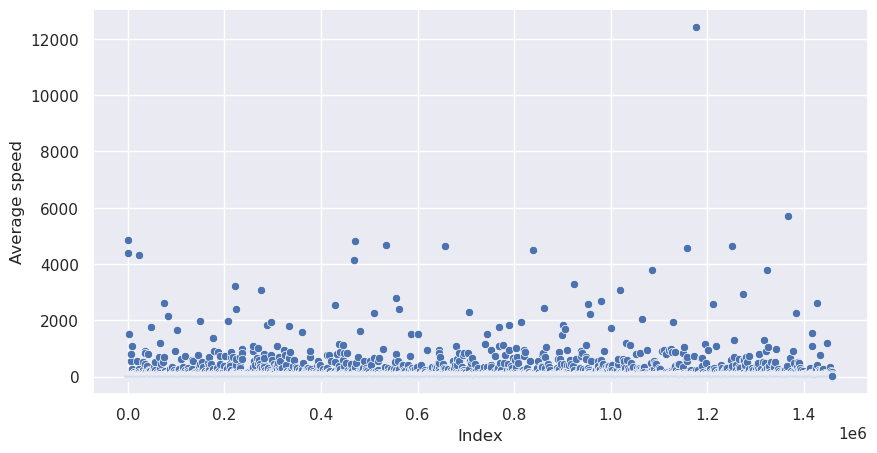

In [140]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [141]:
display(taxi_data.loc[taxi_data['trip_duration'] > 24*60*60].shape[0])

# удаляем поездки продолжительностью более суток
taxi_data = taxi_data.loc[taxi_data['trip_duration'] <= 24*60*60]

4

In [142]:
print('Количество выбросов по признаку длительности поездки:',taxi_data[taxi_data['trip_duration'] > 86400].shape[0])
print('Количество выбросов по признаку скорости:',avg_speed[avg_speed > 300].shape[0])

mask_1 = taxi_data['trip_duration'] <= 86400
mask_2 = (taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6) <= 300
taxi_data = taxi_data[mask_1 & mask_2]

Количество выбросов по признаку длительности поездки: 0
Количество выбросов по признаку скорости: 407


In [143]:
taxi_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events'],
      dtype='object')

## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [144]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

P-value = 0.0
Распределение отлично от нормального


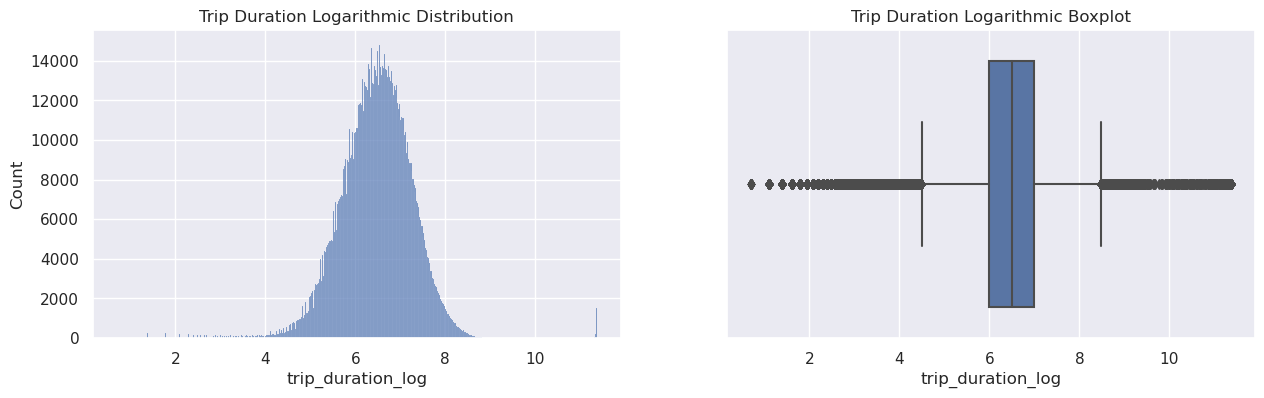

In [145]:
# строим гистограмму и коробчатую диаграмму
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
histplot = sns.histplot(data = taxi_data, x = 'trip_duration_log', ax = axes[0])
histplot.set_title('Trip Duration Logarithmic Distribution')
boxplot = sns.boxplot(data = taxi_data, x = 'trip_duration_log', ax = axes[1])
boxplot.set_title('Trip Duration Logarithmic Boxplot');

# формируем нулевую и альтернативную гипотезы для проверки данных на нормальность
H0 = 'Данные распределены нормально'
Ha = 'Распределение отлично от нормального'

# устанавливаем уровень значимости
alpha = 0.05

# тест Д'Агостино (возвращает двустороннюю вероятность для проверки гипотезы)
_, p = stats.normaltest(taxi_data['trip_duration_log'])
print(f'P-value = {round(p, 2)}')

# интерпритация полученного результата
if p > alpha / 2: # p-value рассчитано для двусторонней гипотезы, поэтому уровень значимости делим на 2
    print(H0)
else:
    print(Ha)

In [146]:
# выполняем тест Д’Агостино
stat, p = stats.normaltest(taxi_data['trip_duration_log'])
alpha = 0.05
if p > alpha:
    print(p, 'Не получилось отвергнуть гипотезу, что распределение не является нормальным')
else:
    print(p, 'Распределение не является нормальным')

0.0 Распределение не является нормальным


### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

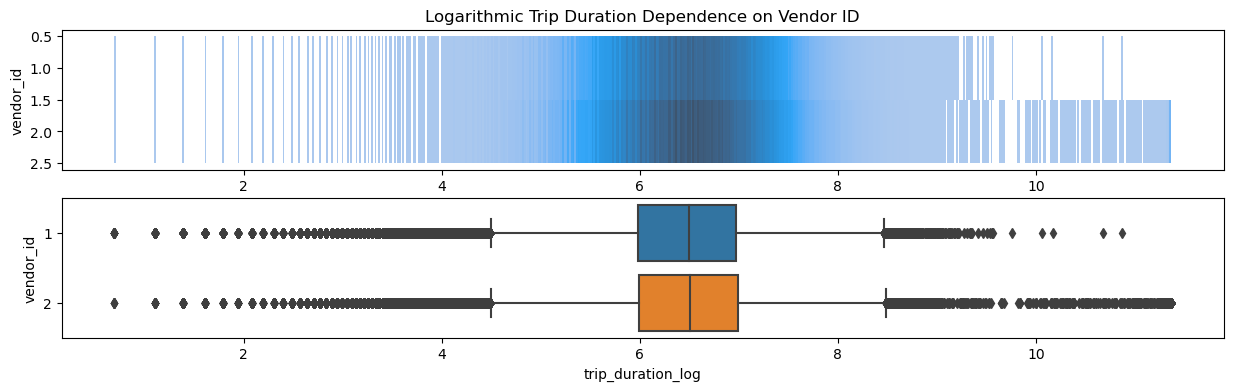

In [42]:
# преобразуем признак vendor_id в категориальный тип данных
taxi_data['vendor_id'] = taxi_data['vendor_id'].astype('category')

# строим гистограмму и коробчатую диаграмму
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 4))
histplot = sns.histplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'vendor_id',
    ax = axes[0])
histplot.set_title('Logarithmic Trip Duration Dependence on Vendor ID')
boxplot = sns.boxplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'vendor_id',
    ax = axes[1]);

Распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки. 

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

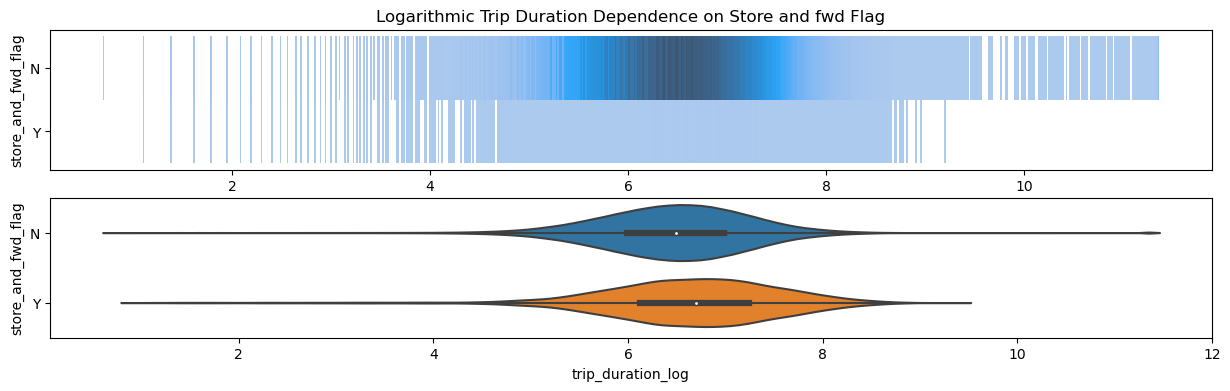

In [43]:
#построим violinplot
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 4))

histplot = sns.histplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'store_and_fwd_flag',
    ax = axes[0])
histplot.set_title('Logarithmic Trip Duration Dependence on Store and fwd Flag')
violinplot = sns.violinplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'store_and_fwd_flag',
    ax = axes[1]);

 Распределения в группах значительно отличаются, признак store_and_fwd_flag имеет значение при определении длительности поездки. 

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

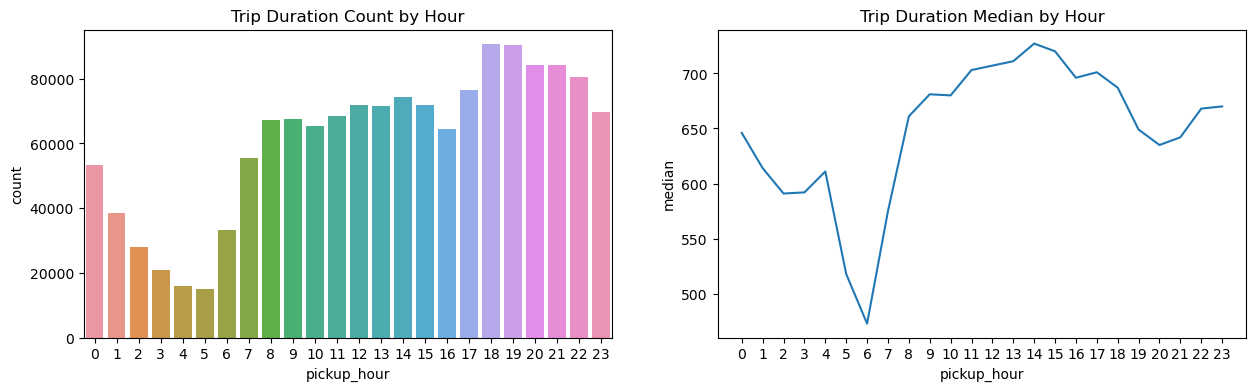

In [44]:
# группируем данные по часу и рассчитываем медианную длительность поездок
duration_by_hour = taxi_data.groupby('pickup_hour')['trip_duration'].median()

# строим графики
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
countplot = sns.countplot(data = taxi_data, x = 'pickup_hour', ax = axes[0])
countplot.set_title('Trip Duration Count by Hour')
lineplot = sns.lineplot(data = duration_by_hour, ax = axes[1])
lineplot.set_title('Trip Duration Median by Hour')
lineplot.xaxis.set_ticks(duration_by_hour.index)
lineplot.set_ylabel('median');

**а** с 0 по 5 часов такси заказывается реже всего  
**б** с 13 пло 18 наблюдается пик медианной длительности поездок

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


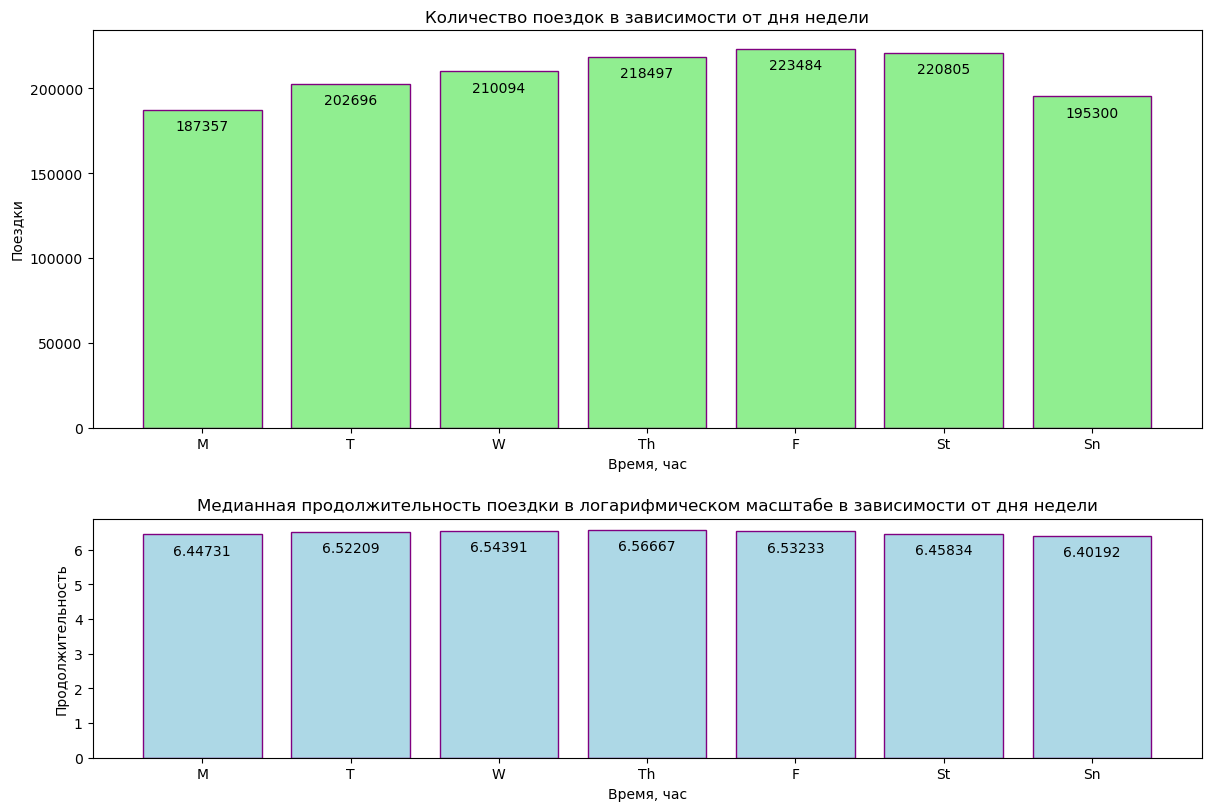

In [45]:
week_data = taxi_data[['trip_duration_log', 'pickup_day_of_week']].groupby('pickup_day_of_week').agg(['count', 'median']).trip_duration_log

fig, ax = plt.subplots(2,1,figsize=(12,8), gridspec_kw={'height_ratios': [5, 3]}, constrained_layout=True)

week_data.index = ['M', "T", 'W', 'Th', 'F', "St", 'Sn']

ax[0].bar(
    week_data.index, week_data['count'], 
    color='lightgreen', edgecolor='purple')

ax[0].set_title('Количество поездок в зависимости от дня недели')
ax[0].set_xlabel('Время, час')
ax[0].set_ylabel('Поездки')
ax[0].set_xticks(week_data.index)
ax[0].bar_label(ax[0].containers[0], padding=-17)

ax[1].bar(
    week_data.index, week_data['median'], 
    color='lightblue', edgecolor='purple')

ax[1].set_title('\nМедианная продолжительность поездки в логарифмическом масштабе в зависимости от дня недели')
ax[1].set_xlabel('Время, час')
ax[1].set_ylabel('Продолжительность')
ax[1].set_xticks(week_data.index)
ax[1].bar_label(ax[1].containers[0], padding=-17)

plt.show()

**а** в пятницу совершается больше всего поездок  
**б** в воскресенье медианная длительность поездок наименьшая

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

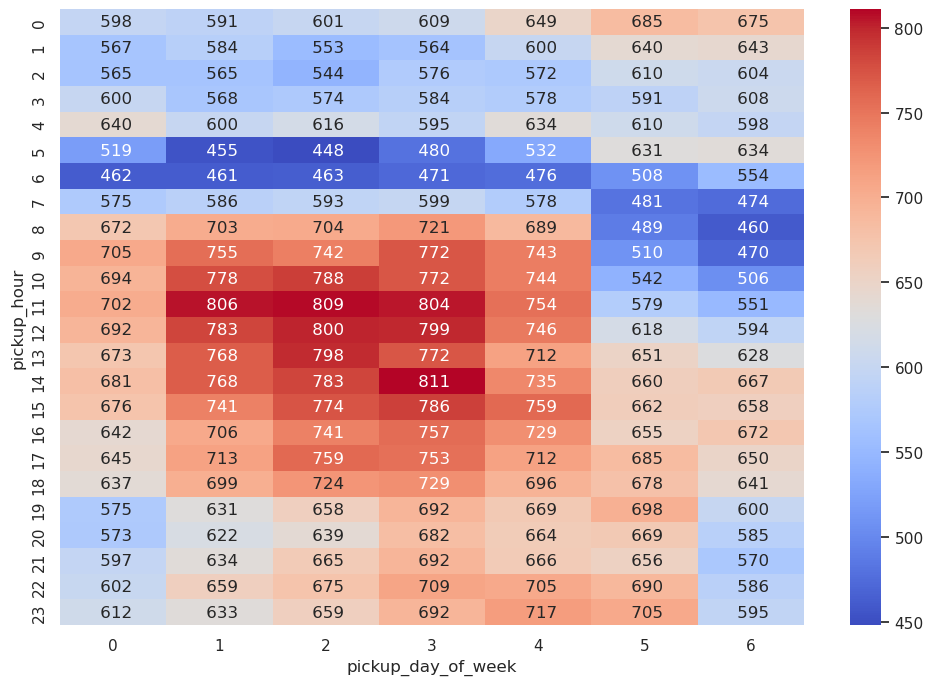

In [46]:
pv = pd.pivot_table(taxi_data, values='trip_duration', index=['pickup_hour'],
                       columns = ['pickup_day_of_week'], aggfunc='median', fill_value=0)

sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(pv.astype('int'), cmap = 'coolwarm', annot=True, fmt=" d")
plt.show()

Самые продолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов.  
Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов дня. 

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


/opt/conda/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


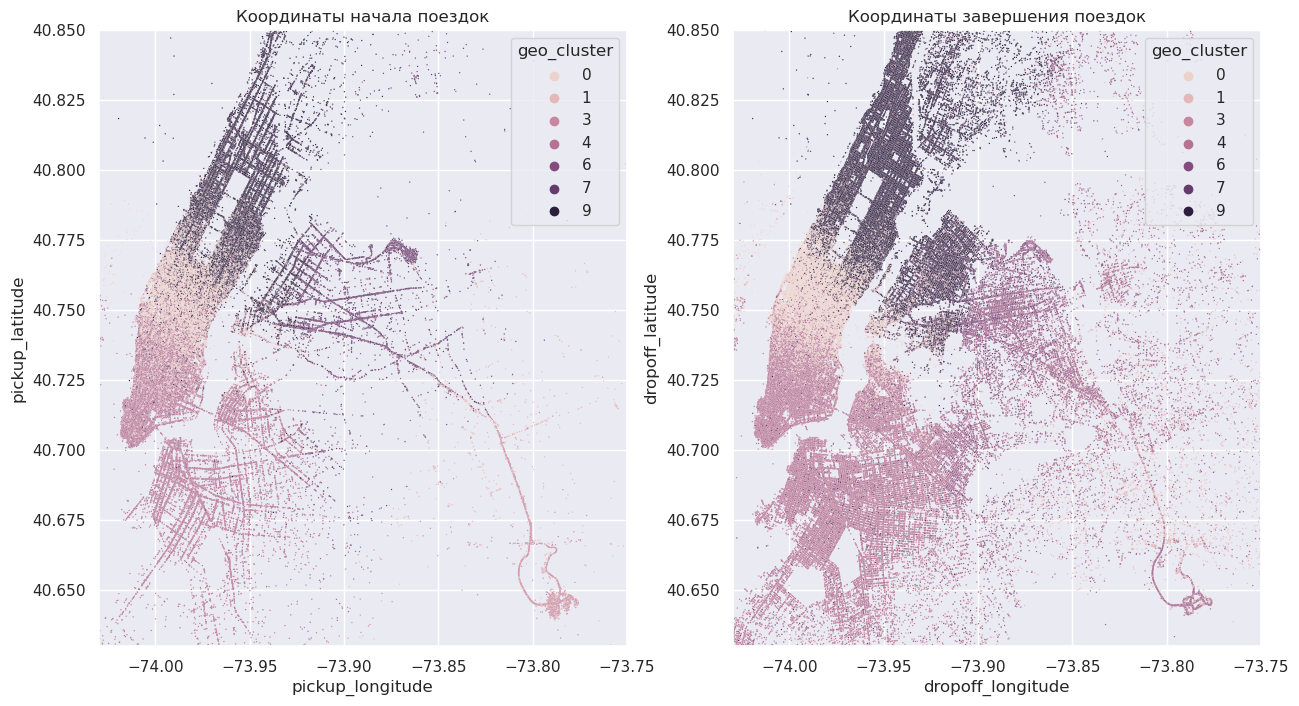

In [47]:
# ограничения по осям
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# строим диаграммы рассеяния
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 8))

scatter_pickup = sns.scatterplot(
    data = taxi_data,
    x = 'pickup_longitude',
    y = 'pickup_latitude',
    hue = 'geo_cluster',
    s = 1,
    ax = axes[0])
scatter_pickup.set_title('Координаты начала поездок')
scatter_pickup.set_xlim(city_long_border)
scatter_pickup.set_ylim(city_lat_border)

scatter_dropoff = sns.scatterplot(
    data = taxi_data,
    x = 'dropoff_longitude',
    y = 'dropoff_latitude',
    hue = 'geo_cluster',
    s = 1,
    ax = axes[1])
scatter_dropoff.set_title('Координаты завершения поездок')
scatter_dropoff.set_xlim(city_long_border)
scatter_dropoff.set_ylim(city_lat_border);

2 и 5 кластеры не попали на карту

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [147]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [148]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-74,41,-74,41,N,...,5,1,100,9,4,8,28,0,None,6
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-74,41,-74,41,N,...,6,2,-117,4,29,16,7,0,None,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-74,41,-74,41,N,...,16,6,-160,4,-7,16,24,0,None,8
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74,41,-74,41,N,...,4,1,-173,4,7,16,26,0,None,6
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-74,41,-74,41,N,...,5,1,179,9,9,16,9,0,None,6


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


**а**  
Уникальным для каждой поездки является её идентификатор — столбец id. Он никак не связан с длительностью поездки и не имеет значения при её прогнозировании.

**б**  
ситуация, в которой данные используемые для обучения модели, содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях. 

**в**  
В наших данных утечку создаёт признак dropoff_datetime — зафиксированное время остановки счётчика. Начиная поездку, мы никак не можем точно знать, когда она закончится, ведь мы как раз и пытаемся предсказать время окончания поездки

In [149]:
#г
train_data.drop(['id','dropoff_datetime'],axis=1,inplace=True)#'dropoff_longitude','dropoff_latitude' разве исключать не надо??
train_data.shape[1]

25

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [150]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [151]:
train_data.vendor_id.value_counts()

2    780118
1    678115
Name: vendor_id, dtype: int64

In [152]:
train_data['vendor_id'] = train_data['vendor_id'].map({1: 0, 2: 1})
train_data.vendor_id.value_counts()

1    780118
0    678115
Name: vendor_id, dtype: int64

In [153]:
train_data.store_and_fwd_flag.value_counts()

N    1450192
Y       8041
Name: store_and_fwd_flag, dtype: int64

In [154]:
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
train_data.store_and_fwd_flag.value_counts()

0    1450192
1       8041
Name: store_and_fwd_flag, dtype: int64

In [155]:
train_data['vendor_id'] = train_data['vendor_id'].astype('int8')
train_data['vendor_id'].mean()

0.53497486341346

In [156]:
train_data.store_and_fwd_flag.mean()

0.005514207948935458

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [157]:
train_data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_day_of_week,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,1,1,-74,41,-74,41,0,455,17,0,...,5,1,100,9,4,8,28,0,None,6
1,0,1,-74,41,-74,41,0,663,0,6,...,6,2,-117,4,29,16,7,0,None,6
2,1,1,-74,41,-74,41,0,2124,11,1,...,16,6,-160,4,-7,16,24,0,None,8
3,1,1,-74,41,-74,41,0,429,19,2,...,4,1,-173,4,7,16,26,0,None,6
4,1,1,-74,41,-74,41,0,435,13,5,...,5,1,179,9,9,16,9,0,None,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,1,4,-74,41,-74,41,0,778,13,4,...,8,1,-119,0,8,16,11,0,None,7
1458640,0,1,-74,41,-74,41,0,655,7,6,...,11,6,25,9,7,3,18,8,Rain,6
1458641,1,1,-74,41,-74,41,0,764,6,4,...,10,8,-151,4,18,16,0,0,None,7
1458642,0,1,-74,41,-74,41,0,373,15,1,...,7,1,35,0,-3,16,9,0,None,6


In [158]:
from sklearn.preprocessing import OneHotEncoder
columns = ['pickup_day_of_week','geo_cluster','events']

In [159]:
enc = OneHotEncoder(drop='first',handle_unknown='ignore', sparse=False)
data_onehot = enc.fit_transform(train_data[columns])
column_names = enc.get_feature_names_out()
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
data_onehot

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,pickup_day_of_week_1,pickup_day_of_week_2,pickup_day_of_week_3,pickup_day_of_week_4,pickup_day_of_week_5,pickup_day_of_week_6,geo_cluster_1,geo_cluster_2,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458228,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1458229,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1458230,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1458231,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Добавим полученную таблицу с закодированными признаками:

In [160]:
columns_to_change = columns #мы же код оригинальный не меняем

In [161]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


In [64]:
train_data

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_hour,pickup_holiday,...,geo_cluster_3,geo_cluster_4,geo_cluster_5,geo_cluster_6,geo_cluster_7,geo_cluster_8,geo_cluster_9,events_None,events_Rain,events_Snow
0,1,1,-74,41,-74,41,0,455,17,0,...,0,0,0,0,0,0,1,1,0,0
1,0,1,-74,41,-74,41,0,663,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1,1,-74,41,-74,41,0,2124,11,0,...,0,1,0,0,0,0,0,1,0,0
3,1,1,-74,41,-74,41,0,429,19,0,...,0,1,0,0,0,0,0,1,0,0
4,1,1,-74,41,-74,41,0,435,13,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458228,1,4,-74,41,-74,41,0,778,13,0,...,0,0,0,0,0,0,0,1,0,0
1458229,0,1,-74,41,-74,41,0,655,7,0,...,0,0,0,0,0,0,1,0,1,0
1458230,1,1,-74,41,-74,41,0,764,6,0,...,0,1,0,0,0,0,0,1,0,0
1458231,0,1,-74,41,-74,41,0,373,15,0,...,0,0,0,0,0,0,0,1,0,0


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [162]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [163]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [164]:
from sklearn.feature_selection import SelectKBest, f_regression
select = SelectKBest(score_func = f_regression, k=25)
select.fit(X_train, y_train_log)
columns_x = select.get_feature_names_out()

In [165]:
X_train = select.transform(X_train)
X_train = pd.DataFrame(X_train, columns=columns_x)
X_valid = select.transform(X_valid)
X_valid = pd.DataFrame(X_valid, columns=columns_x)
X_valid.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_hour', 'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'temperature',
       'pickup_day_of_week_1', 'pickup_day_of_week_2', 'pickup_day_of_week_3',
       'pickup_day_of_week_4', 'pickup_day_of_week_5', 'pickup_day_of_week_6',
       'geo_cluster_1', 'geo_cluster_3', 'geo_cluster_5', 'geo_cluster_7',
       'geo_cluster_9'],
      dtype='object')

Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [169]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_columns = scaler.get_feature_names_out()
X_valid = scaler.transform(X_valid)
X_valid[0].mean()
round(X_valid[:,0].mean(),2)

0.54

In [170]:
X_train = pd.DataFrame(X_train, columns=X_columns)
X_valid = pd.DataFrame(X_valid, columns=X_columns)

## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [171]:
X_train.info() #проводим сверку

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977016 entries, 0 to 977015
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             977016 non-null  float64
 1   passenger_count       977016 non-null  float64
 2   pickup_longitude      977016 non-null  float64
 3   pickup_latitude       977016 non-null  float64
 4   dropoff_longitude     977016 non-null  float64
 5   dropoff_latitude      977016 non-null  float64
 6   store_and_fwd_flag    977016 non-null  float64
 7   pickup_hour           977016 non-null  float64
 8   pickup_holiday        977016 non-null  float64
 9   total_distance        977016 non-null  float64
 10  total_travel_time     977016 non-null  float64
 11  number_of_steps       977016 non-null  float64
 12  haversine_distance    977016 non-null  float64
 13  temperature           977016 non-null  float64
 14  pickup_day_of_week_1  977016 non-null  float64
 15  

In [73]:
X_valid.info() # проводим сверку

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481217 entries, 0 to 481216
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vendor_id             481217 non-null  float64
 1   passenger_count       481217 non-null  float64
 2   pickup_longitude      481217 non-null  float64
 3   pickup_latitude       481217 non-null  float64
 4   dropoff_longitude     481217 non-null  float64
 5   dropoff_latitude      481217 non-null  float64
 6   store_and_fwd_flag    481217 non-null  float64
 7   pickup_hour           481217 non-null  float64
 8   pickup_holiday        481217 non-null  float64
 9   total_distance        481217 non-null  float64
 10  total_travel_time     481217 non-null  float64
 11  number_of_steps       481217 non-null  float64
 12  haversine_distance    481217 non-null  float64
 13  temperature           481217 non-null  float64
 14  pickup_day_of_week_1  481217 non-null  float64
 15  

In [172]:
#импортируем библиотеки
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

LR = LinearRegression() # создаём объект класса линейной регрессии

LR.fit(X_train, y_train_log) #проводим обучение

y_pred_t = LR.predict(X_train) #предсказание для тренировочной выборки
y_pred_v = LR.predict(X_valid) #предсказание для валидационной выборки

print(mean_squared_error(y_pred_t,y_train_log,squared=False)) #метрика для тренировочной выборки
print(mean_squared_error( y_pred_v,y_valid_log,squared=False)) #метрика для валидационной выборки

0.5356435185027016
0.5380984271876291


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [173]:
from sklearn.preprocessing import PolynomialFeatures #импортируем библиотеку для создания полиномиальных признаков

poly = PolynomialFeatures(degree = 2, include_bias = False)# создаём генератор полиномиальных признаков
poly.fit(X_train) 

# генерируем полиномиальные признаки
X_train_p = poly.transform(X_train)
X_valid_p = poly.transform(X_valid)

# строим модель полиномиальной регрессии
lr_p = linear_model.LinearRegression()
lr_p.fit(X_train_p, y_train_log)
y_train_pred = lr_p.predict(X_train_p)
y_valid_pred = lr_p.predict(X_valid_p)

# рассчитываем RMSLE
print('RMSE на тренировочной выборке:',round((mean_squared_error(y_train_log, y_train_pred,squared=False)), 2))
print('RMSE на валидационной выборке:',round((mean_squared_error(y_valid_log, y_valid_pred,squared=False)), 2))

RMSE на тренировочной выборке: 0.47
RMSE на валидационной выборке: 0.7


### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [174]:
# создаём объект класса линейной регрессии с L2-регуляризацией
lr_ridge = linear_model.Ridge(alpha = 1)

# обучаем модель
lr_ridge.fit(X_train_p, y_train_log)

# делаем предсказания
y_train_pred = lr_ridge.predict(X_train_p)
y_valid_pred = lr_ridge.predict(X_valid_p)

# рассчитываем RMSLE
print('RMSE на тренировочной выборке:',round(mean_squared_error(y_train_log, y_train_pred,squared=False), 2))
print('RMSE на валидационной выборке:',round(mean_squared_error(y_valid_log, y_valid_pred,squared=False), 2))

RMSE на тренировочной выборке: 0.48
RMSE на валидационной выборке: 0.48


### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [175]:
# строим модель дерева решений
dt_reg = tree.DecisionTreeRegressor(random_state = 42)
dt_reg.fit(X_train, y_train_log)

# делаем предсказания
y_train_pred = dt_reg.predict(X_train)
y_valid_pred = dt_reg.predict(X_valid)

# рассчитываем RMSLE
print('RMSE на тренировочной выборке:',round(mean_squared_error(y_train_log, y_train_pred, squared=False), 2))
print('RMSE на валидационной выборке:',round(mean_squared_error(y_valid_log, y_valid_pred, squared=False), 2))

RMSE на тренировочной выборке: 0.0
RMSE на валидационной выборке: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


RMSLE на тренировочной выборке: 0.41
RMSLE на валидационной выборке: 0.43


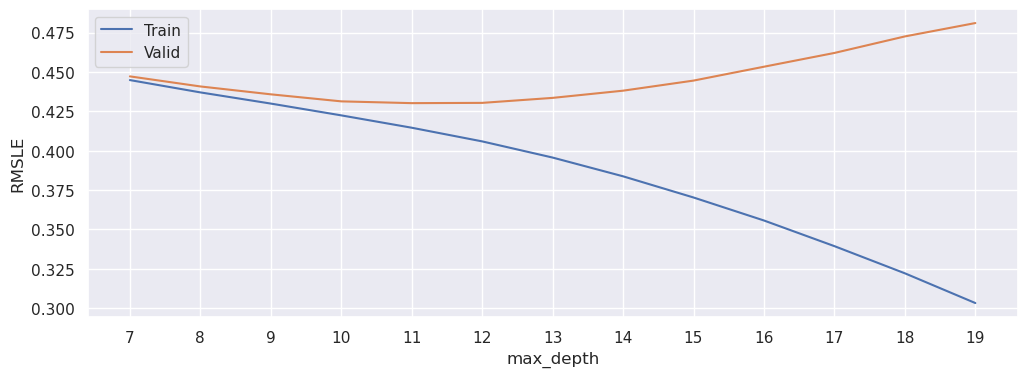

In [176]:
from sklearn.tree import DecisionTreeRegressor
# создаём список из 13 возможных значений от 7 до 20
max_depths = range(7, 20)

# создаём пустые списки, в которые будем добавлять результаты
train_scores = []
valid_scores = []

for depth in max_depths:
    # создаём объект класса DecisionTreeRegressor
    dt_reg = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    # обучаем модель
    dt_reg.fit(X_train, y_train_log)
    # делаем предсказание для тренировочной выборки
    y_train_pred = dt_reg.predict(X_train)
    # делаем предсказание для валидационной выборки
    y_valid_pred = dt_reg.predict(X_valid)
    # рассчитываем RMSLE для двух выборок и добавляем их в списки
    train_scores.append(metrics.mean_squared_error(y_train_log, y_train_pred, squared=False))
    valid_scores.append(metrics.mean_squared_error(y_valid_log, y_valid_pred, squared=False))

# визуализируем изменения RMSLE в зависимости от max_depth
fig, ax = plt.subplots(figsize = (12, 4))          # фигура + координатная плоскость
ax.plot(max_depths, train_scores, label = 'Train') # линейный график для тренировочной выборки
ax.plot(max_depths, valid_scores, label = 'Valid') # линейный график для валидационной выборки
ax.set_xlabel('max_depth')                         # название оси абсцисс
ax.set_ylabel('RMSLE')                             # название оси ординат
ax.set_xticks(max_depths)                          # метки на оси абсцисс
ax.legend();                                       # отображение легенды

# извлекаем индекс лучшего RMSLE на валидационной выборке
best_index = valid_scores.index(min(valid_scores))
print('RMSLE на тренировочной выборке:', round(train_scores[best_index], 2))
print('RMSLE на валидационной выборке:', round(valid_scores[best_index], 2))

б)
после 12 дерева наблюдается ухудшение значения метрики.  
Ответ 12

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [201]:
%%time
from sklearn.ensemble import RandomForestRegressor
rfс = RandomForestRegressor(
    n_estimators = 200,
    max_depth = 12,
    criterion = 'squared_error',
    min_samples_split = 20,
    random_state = 42)

# обучаем модель
rfс.fit(X_train, y_train_log)

# делаем предсказания
y_train_pred = rfс.predict(X_train)
y_valid_pred = rfс.predict(X_valid)

# рассчитываем RMSLE
print('RMSLE на тренировочной выборке:',round(mean_squared_error(y_train_log, y_train_pred, squared=False), 2))
print('RMSLE на валидационной выборке:',round(mean_squared_error(y_valid_log, y_valid_pred, squared=False), 2))

RMSLE на тренировочной выборке: 0.4
RMSLE на валидационной выборке: 0.41
CPU times: user 33min 13s, sys: 237 ms, total: 33min 13s
Wall time: 33min 13s


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [202]:
from sklearn.ensemble import GradientBoostingRegressor #импортируем
gbr = GradientBoostingRegressor(
    learning_rate = 0.5,
    n_estimators = 100,
    max_depth = 6,
    min_samples_split = 30,
    random_state = 42)

# обучаем модель
gbr.fit(X_train, y_train_log)

# делаем предсказания
y_train_pred = gbr.predict(X_train)
y_valid_pred = gbr.predict(X_valid)

# рассчитываем RMSLE
print('RMSLE на тренировочной выборке:', round(metrics.mean_squared_error(y_train_log, y_train_pred,squared=False), 2))
print('RMSLE на валидационной выборке:', round(metrics.mean_squared_error(y_valid_log, y_valid_pred,squared=False), 2))

RMSLE на тренировочной выборке: 0.37
RMSLE на валидационной выборке: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


**Ответ:** Градиентный бустинг над деревьями решений 

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


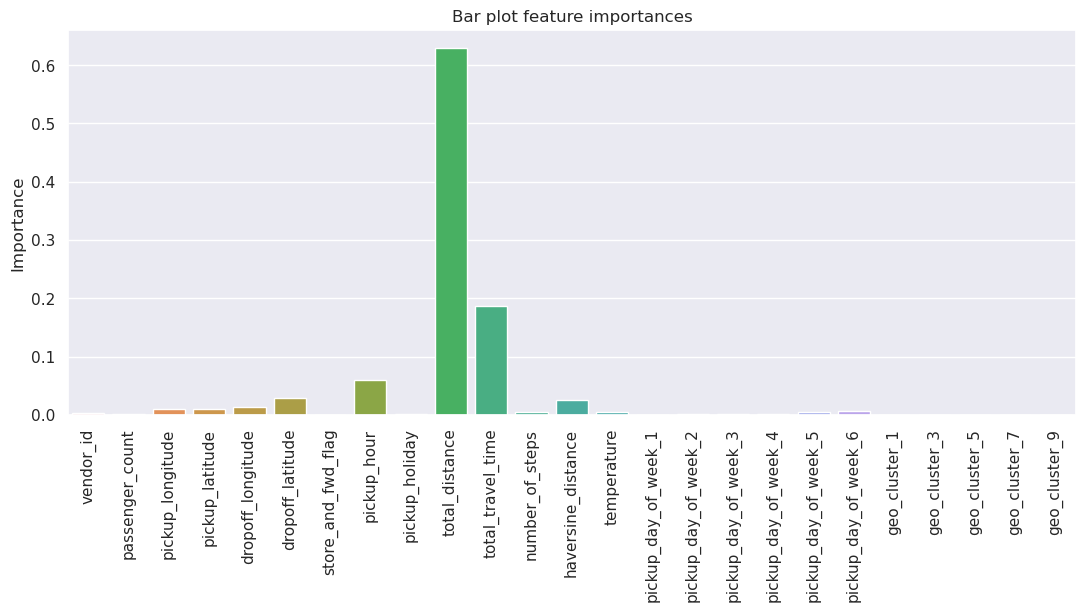

In [203]:
fig, ax = plt.subplots(figsize = (13, 5)) # фигура + координатная плоскость
features = X_train.columns                # признаки
importances = gb_reg.feature_importances_ # важность признаков

# строим столбчатую диаграмму
sns.barplot(x = features, y = importances, ax = ax)
ax.set_title('Bar plot feature importances') # название графика
ax.set_ylabel('Importance')                  # название оси ординат
ax.xaxis.set_tick_params(rotation = 90)      # поворот меток на оси абсцисс

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [204]:
# переводим из логарифимического маштаба в изначальный
y_valid = np.exp(y_valid_log) - 1
y_valid_pred_exp = np.exp(y_valid_pred) - 1

# рассчитываем медианную абсолютную ошибку
meae_valid = metrics.median_absolute_error(y_valid, y_valid_pred_exp)

# переводим значение метрики в минуты и округляем
print('MeAE на валидационной выборке:', round(meae_valid / 60, 1), 'мин')

MeAE на валидационной выборке: 1.8 мин


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [231]:
#подтягиваем с dropbox датасет и импортируем через pandas
!wget https://www.dropbox.com/s/szuo7q51aitvts9/Project5_test_data.csv
!wget https://www.dropbox.com/s/vcay2ibzlwgg7xc/Project5_osrm_data_test.csv
test_data = pd.read_csv("/kaggle/working/Project5_test_data.csv")
osrm_data_test = pd.read_csv("/kaggle/working/Project5_osrm_data_test.csv")
test_id = test_data['id']

--2023-06-10 18:27:08--  https://www.dropbox.com/s/szuo7q51aitvts9/Project5_test_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/szuo7q51aitvts9/Project5_test_data.csv [following]
--2023-06-10 18:27:08--  https://www.dropbox.com/s/raw/szuo7q51aitvts9/Project5_test_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4904ecb7516a0ad5c744952d1a.dl.dropboxusercontent.com/cd/0/inline/B9si7G2lbuvT0sBmtX2hb3f61uKd_3HqHKLJwnbBxPfKAeznJozhQDNHqdVskHsxHlbZYjVRzpour8XtZuRkNgl5DexVyeZIUPgwq6O2wICqBFbriby8nKybCxIxc1YHBDX3eLgUsc7NuoVutgJDXTq_mX8klocakoBLkdZMn3cGpw/file# [following]
--2023-06-10 18:27:09--  https://uc4904ecb7516a0ad5c744952d1a.dl.dropboxusercontent.com/cd/0/inline/B9si7G2lbuvT0sBmtX2hb3f61uKd_3HqHKLJwnbBxPfKAez

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [232]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = env.fit_transform(test_data[columns_to_change]).toarray()
column_names = env.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[columns_x]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

Shape of data: (625134, 25)


Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [237]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('submission_gb.csv', index=False)

In [239]:
# делаем предсказание для тестовой выборки
y_test_pred_log = gbr.predict(X_test_scaled)

# переводим предсказания из логарифмического маштаба в истинный
y_test_predict = np.exp(y_test_pred_log) - 1

# создаём submission-файл
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('/kaggle/working/submission_gb.csv', index=False)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [240]:
!pip install xgboost

После чего модуль можно импортировать:

In [241]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [247]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train_log, feature_names=columns_x)
dvalid = xgb.DMatrix(X_valid, label=y_valid_log, feature_names=columns_x)
dtest = xgb.DMatrix(X_test_scaled, feature_names=columns_x)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [248]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10) #шаг, через который происходит отображение метрик

[0]	train-rmse:5.42222	valid-rmse:5.42195
[10]	train-rmse:1.93570	valid-rmse:1.93568
[20]	train-rmse:0.78554	valid-rmse:0.78636
[30]	train-rmse:0.47951	valid-rmse:0.48155
[40]	train-rmse:0.42185	valid-rmse:0.42460
[50]	train-rmse:0.40989	valid-rmse:0.41310
[60]	train-rmse:0.40505	valid-rmse:0.40877
[70]	train-rmse:0.40116	valid-rmse:0.40524
[80]	train-rmse:0.39927	valid-rmse:0.40366
[90]	train-rmse:0.39777	valid-rmse:0.40257
[100]	train-rmse:0.39563	valid-rmse:0.40071
[110]	train-rmse:0.39439	valid-rmse:0.39970
[120]	train-rmse:0.39358	valid-rmse:0.39911
[130]	train-rmse:0.39259	valid-rmse:0.39838
[140]	train-rmse:0.39160	valid-rmse:0.39779
[150]	train-rmse:0.39048	valid-rmse:0.39699
[160]	train-rmse:0.38983	valid-rmse:0.39661
[170]	train-rmse:0.38900	valid-rmse:0.39602
[180]	train-rmse:0.38819	valid-rmse:0.39555
[190]	train-rmse:0.38706	valid-rmse:0.39485
[200]	train-rmse:0.38625	valid-rmse:0.39430
[210]	train-rmse:0.38552	valid-rmse:0.39397
[220]	train-rmse:0.38475	valid-rmse:0.39360

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [268]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Modeling RMSLE 0.39167


Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

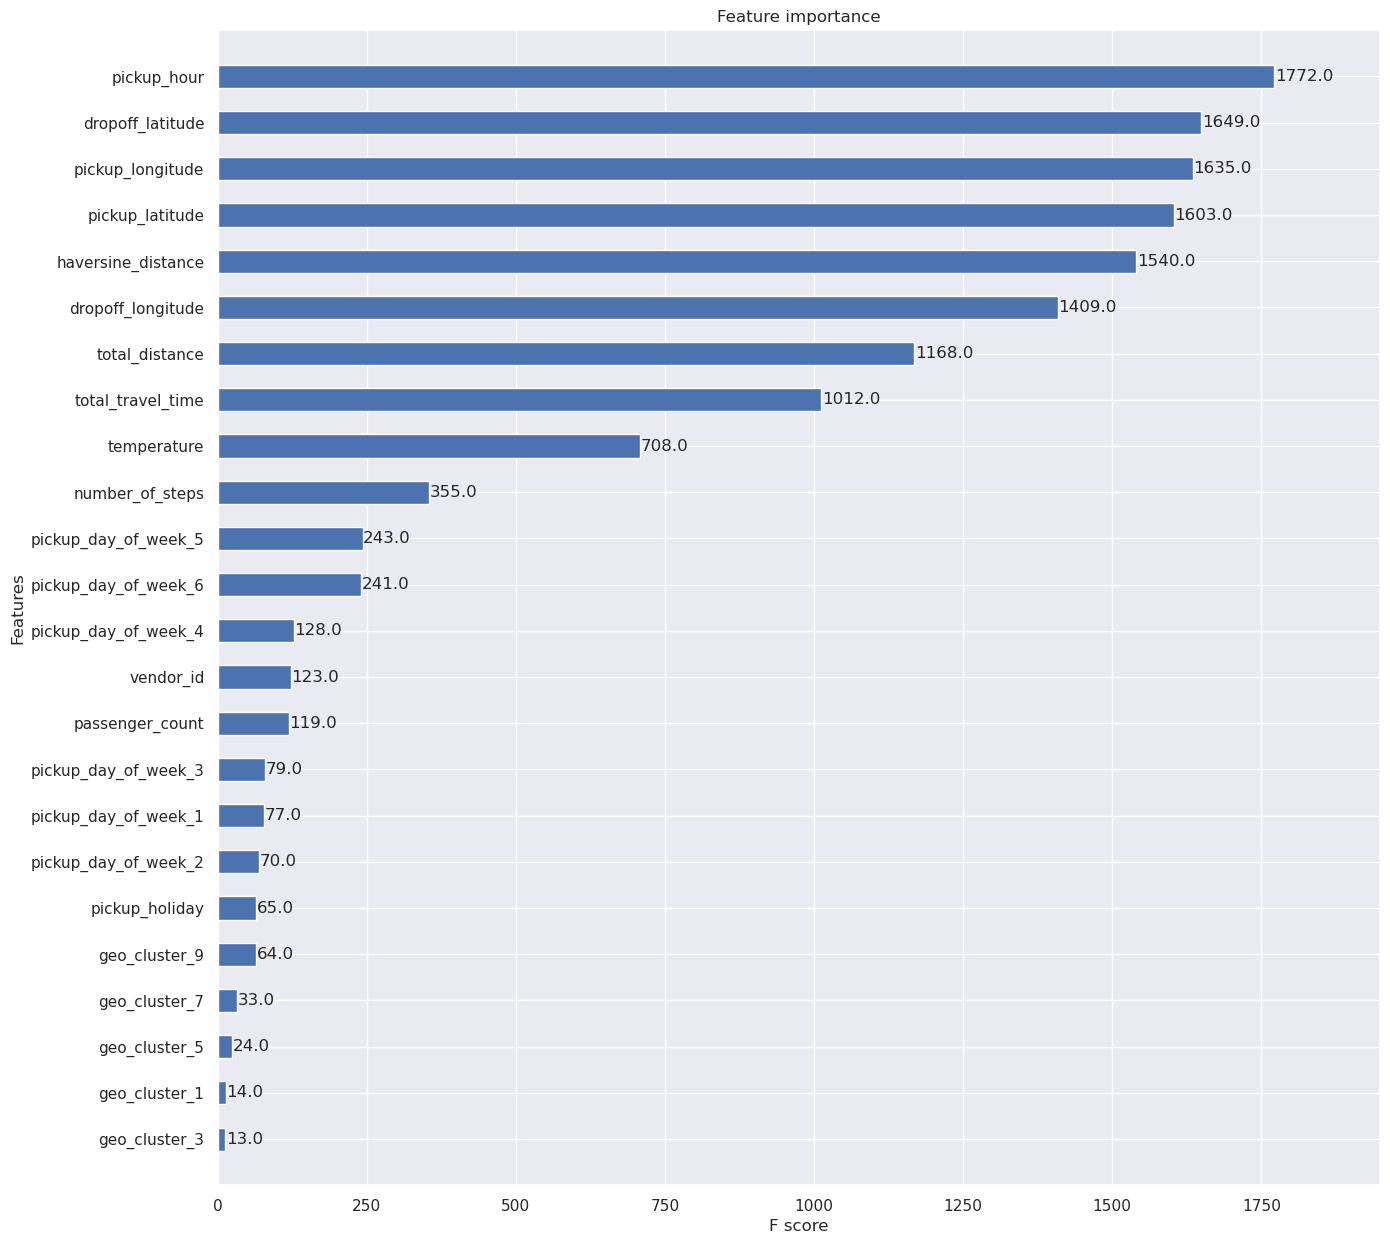

In [250]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)

## catboost

In [251]:
!pip install catboost

In [256]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(verbose=50)
cat.fit(X_train, y_train_log)

Learning rate set to 0.121502
0:	learn: 0.7354135	total: 212ms	remaining: 3m 31s
1:	learn: 0.6878705	total: 320ms	remaining: 2m 39s
2:	learn: 0.6479123	total: 420ms	remaining: 2m 19s
3:	learn: 0.6140946	total: 516ms	remaining: 2m 8s
4:	learn: 0.5856516	total: 617ms	remaining: 2m 2s
5:	learn: 0.5623678	total: 719ms	remaining: 1m 59s
6:	learn: 0.5426305	total: 818ms	remaining: 1m 56s
7:	learn: 0.5266405	total: 910ms	remaining: 1m 52s
8:	learn: 0.5132552	total: 1s	remaining: 1m 50s
9:	learn: 0.5024452	total: 1.1s	remaining: 1m 48s
10:	learn: 0.4928215	total: 1.19s	remaining: 1m 47s
11:	learn: 0.4851025	total: 1.29s	remaining: 1m 46s
12:	learn: 0.4783353	total: 1.38s	remaining: 1m 45s
13:	learn: 0.4727362	total: 1.48s	remaining: 1m 43s
14:	learn: 0.4681499	total: 1.57s	remaining: 1m 42s
15:	learn: 0.4641810	total: 1.67s	remaining: 1m 42s
16:	learn: 0.4609538	total: 1.77s	remaining: 1m 42s
17:	learn: 0.4578383	total: 1.87s	remaining: 1m 41s
18:	learn: 0.4552866	total: 1.97s	remaining: 1m 41

In [273]:
y_test_predict = np.exp(cat.predict(X_test)) - 1
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('/kaggle/working/submission_cat.csv', index=False)